In [1]:
%load_ext autoreload
%autoreload 2

In [101]:
import numpy as np
from scipy import stats
import pylab as plt
import torch
import swyft
from torch import nn
from simulators import SimulatorBlob, SimulatorLinePattern, SimulatorLetter, SimulatorSnake, SimulatorUnraveling

  0%|          | 0/1 [00:00<?, ?it/s]

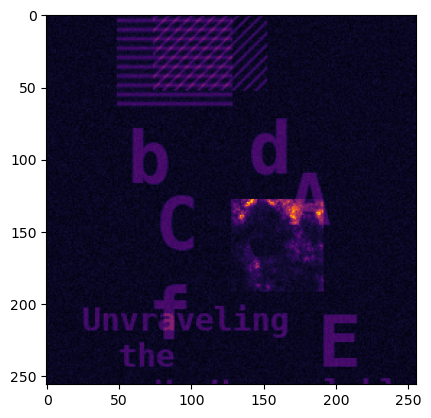

In [130]:
class SimCom(swyft.Simulator):
    def __init__(self):
        super().__init__()
        self.sim1 = SimulatorLinePattern()
        self.sim2 = SimulatorBlob()
        self.sim3 = SimulatorLetter()
        self.sim4 = SimulatorSnake()
        self.sim5 = SimulatorUnraveling()
        
    def embed(self, mu_in):
        mu = np.zeros((256, 256))
        i, j = 128, 128
        mu[i:i+64, j:j+64] += mu_in.numpy()*0.1
        return mu
        
    def build(self, graph):
        with graph.prefix("line/"):
            self.sim1.build(graph)
        with graph.prefix("blob/"):
            self.sim2.build(graph)
        with graph.prefix("letters/"):
            self.sim3.build(graph)
        with graph.prefix("snake/"):
            self.sim4.build(graph)
        with graph.prefix("unraveling/"):
            self.sim5.build(graph)
        mu1 = graph['line/mu']
        mu2_original = graph['blob/mu']
        mu3 = graph['letters/mu']
        mu4 = graph['snake/mu']
        mu5 = graph['unraveling/mu']
        mu2 = graph.node("blob/mu_embedded", self.embed, mu2_original)
        mu = graph.node("mu", lambda *args: sum([*args])+np.random.randn(256, 256)*0.1, mu1, mu2, mu3, mu4, mu5)

        
sim = SimCom()
mu = sim.sample(1)[0]['mu']
plt.imshow(mu, cmap = 'inferno')

In [129]:
samples = sim.sample(1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

KeyboardInterrupt: 